# Python в инженерных расчетах. Лекция 10.
<hr style="border:2px solid gray">

#### План занятия:
1. **Повторение материалов лекции №09**
2. **Проверка значимости коэффициентов полученного уравнения с помощью критерия Стьюдента**
3. **Проверка адекватности модели по критерию Фишера**
4. **Проверка модели по коэффициенту детерминации и графику паритета**
5. **Работа с итоговой моделью**

## 1. Повторение материалов лекции №09
<hr style="border:2px solid gray">

### Задача
Исследуем влияние трёх факторов на целевую переменную $ y $ — **предел текучести стали $ \sigma_{02} $, МПа**:
- $ x_1 $: содержание углерода (0.06% – 0.10%)
- $ x_2 $: толщина материала (0.7 мм – 1.2 мм)
- $ x_3 $: угол относительно направления проката (0° – 90°)

Построим модель в виде линейной регрессии:
$$
\hat{y} = b_0 + b_1 x_1 + b_2 x_2 + b_3 x_3
$$

<hr style="border:2px solid gray">

В ходе анализа проверим:
- Однородность дисперсий опытов — **критерий Кохрена**
- Значимость коэффициентов — **критерий Стьюдента**
- Адекватность модели — **критерий Фишера**

---

### Экспериментальные данные

Проведён **Полный Факторный Эксперимент (ПФЭ 2³)** — 3 фактора на 2 уровнях, всего 8 опытов.  
Каждый опыт повторён 3 раза для оценки ошибки воспроизводимости.

Данные получены для сталей **DC01** и **DC04**:

- **DC01**: $ C = 0.10\% $
- **DC04**: $ C = 0.06\% $

---

### Матрица планирования в натуральных переменных

| № опыта | Содержание углерода, % | Толщина, мм | Угол проката, ° | $ y_1 $, МПа | $ y_2 $, МПа | $ y_3 $, МПа |
|:-------:|:----------------------:|:-----------:|:---------------:|:------------:|:------------:|:------------:|
| 1       | 0.10                   | 0.7         | 0               | 238          | 237          | 239          |
| 2       | 0.06                   | 0.7         | 0               | 160          | 161          | 159          |
| 3       | 0.10                   | 1.2         | 0               | 240          | 241          | 239          |
| 4       | 0.06                   | 1.2         | 0               | 186          | 185          | 187          |
| 5       | 0.10                   | 0.7         | 90              | 243          | 244          | 242          |
| 6       | 0.06                   | 0.7         | 90              | 164          | 163          | 165          |
| 7       | 0.10                   | 1.2         | 90              | 242          | 243          | 241          |
| 8       | 0.06                   | 1.2         | 90              | 201          | 200          | 202          |


In [24]:
import numpy as np
import matplotlib.pyplot as plt

from Lection_009 import CochranTable, StudentTable, FisherTable, Full_factorial_matrix, Regression
from Lection_008 import SetOfCurves

# Настройки отображения
np.set_printoptions(precision=4, suppress=True)

In [25]:
# Матрица планирования ПФЭ (три фактора на двух уровнях)
matrix = Full_factorial_matrix(3)

In [26]:
# Значения целевой переменной: каждая строка — 3 повторения одного и того же из восьми опытов
y_repeated = np.array([
    [238.5, 237.0, 239.2],  # Опыт 1: C=0.10%, h=0.7 мм, θ=0°  → DC01
    [160.9, 161.4, 158.0],  # Опыт 2: C=0.06%, h=0.7 мм, θ=0°  → DC04
    [240.2, 241.9, 239.0],  # Опыт 3: C=0.10%, h=1.2 мм, θ=0° → DC01
    [183.1, 185.4, 187.8],  # Опыт 4: C=0.06%, h=1.2 мм, θ=0° → DC04
    [241.4, 244.8, 242.3],  # Опыт 5: C=0.10%, h=0.7 мм, θ=90° → DC01
    [165.6, 163.2, 165.5],  # Опыт 6: C=0.06%, h=0.7 мм, θ=90° → DC04
    [243.1, 243.1, 241.2],  # Опыт 7: C=0.10%, h=1.2 мм, θ=90° → DC01
    [201.9, 198.3, 202.1],  # Опыт 8: C=0.06%, h=1.2 мм, θ=90° → DC04
])

# для дальнейшей регрессии создаем обхект regression и в качестве атрибутов подаем в него матрицу в кодированном масштабе и целевую переменную
regression = Regression(matrix.matrix_normalized, y_repeated)

In [27]:
# Расчет построчной дисперсии целевой переменной, дисперсии воспроизводимости и средненго значения целевой переменной
regression.get_S2()
print ('Среднее значение и построчная дисперсия')
for i in range (len(regression.S2)):
    print (f'Опыт № {i}: {regression.target_values_avg[i]:.3f}   {regression.S2[i]:.3f}')

✅ Дисперсии однородны. Можно продолжать анализ.
Среднее значение и построчная дисперсия
Опыт № 0: 238.233   1.263
Опыт № 1: 160.100   3.370
Опыт № 2: 240.367   2.123
Опыт № 3: 185.433   5.523
Опыт № 4: 242.833   3.103
Опыт № 5: 164.767   1.843
Опыт № 6: 242.467   1.203
Опыт № 7: 200.767   4.573


In [28]:
# добавляем столбец с единицами в матрицу планирования в кодированном масштабе и расчитываем пкоэффициенты
# уравнения
_ = regression.get_coefficients()

print("Коэффициенты модели:")
for i in range (len(regression.coefs)):
    print (f'b{i}: {regression.coefs[i]:.2f}')

Коэффициенты модели:
b0: 209.37
b1: 31.60
b2: 7.89
b3: 3.34


## 2. Проверка значимости коэффициентов по критерию Стьюдента


После построения модели важно понять какие коэффициенты действительно влияют на отклик, а какие — просто "шум"?

Для этого используется **критерий Стьюдента (t-критерий)**.

---

### Порядок анализа с помощью критерия Стьюдента

#### 1. **Стандартная ошибка коэффициента**

Показывает, **насколько точно** мы оценили коэффициент.

Для ортогонального плана ПФЭ:
$$
\text{SE}(b_j) = \sqrt{\frac{S^2_{\text{воспр}}}{N}}, \quad j \ge 1
$$

Где:
- $ S^2_{\text{воспр}} $ — средняя дисперсия воспроизводимости
- $ N $ — число опытов (в нашем случае N = 8)
- $ j $ - номер коэффициента, который мы проверяем на значимость



#### 2. Расчетный **t-критерий**

$$
t_j = \frac{|b_j|}{\text{SE}(b_j)}
$$

Чем больше $ |b_j| $ по сравнению с ошибкой — тем **выше уверенность**, что коэффициент значим.


#### 3. Табличный **t-критерий**

Сравниваем $ t_j $ с табличным значением $ t_{\text{крит}} $, которое зависит от:

- $ f $ — числа степеней свободы: $ f = n \cdot (m - 1) $
- $ \alpha = 0.05 $ — уровня значимости

В нашем случае:
- $ n = 8 $ опытов
- $ m = 3 $ повторения
- $ f = 8 \cdot (3 - 1) = 16 $
- $ t_{\text{крит}}(f=16,\ \alpha=0.05) = 2.120 $

Если $ t_j > t_{\text{крит}} $, то коэффициент **статистически значим**.



### Таблица: Критические значения t-критерия Стьюдента ($ \alpha = 0.05 $)

| Число степеней свободы $ f $ | $ t_{\text{крит}} $ |
|-------------------------------|----------------------|
| 1                             | 12.706               |
| 2                             | 4.303                |
| 3                             | 3.182                |
| 4                             | 2.776                |
| 5                             | 2.571                |
| 6                             | 2.447                |
| 7                             | 2.365                |
| 8                             | 2.306                |
| 9                             | 2.262                |
| 10                            | 2.228                |
| 12                            | 2.179                |
| 14                            | 2.145                |
| 16                            | 2.120                |
| 18                            | 2.101                |
| 20                            | 2.086                |
| 30                            | 2.042                |
| ∞                             | 1.960                |



### Пример расчёта

Пусть:
- $ b_1 = 31.60 $
- $ S^2_{\text{воспр}} = 2.87 $
- $ N = 8 $

Тогда:
$$
\text{SE}(b_1) = \sqrt{\frac{2.87}{8}} = \sqrt{0.35875} \approx 0.5989
$$
$$
t_1 = \frac{|31.60|}{0.5989} \approx 52.76
$$

Сравниваем:  
$ 52.76 > 2.120 $ → **коэффициент $ b_1 $ значим**

Это означает: **содержание углерода действительно влияет на предел текучести**.

In [29]:
# запустим проверку коэффициентов:
_ = regression.check_coefficients()

In [30]:
# Посмотрим результаты

In [31]:
print (f'Cредняя дисперсия воспроизводимости: {regression.S2_vospr:.3f}')

Cредняя дисперсия воспроизводимости: 2.875


In [32]:
print (f'Табличный критерий Стьюдента: {regression.student_max}')

Табличный критерий Стьюдента: 2.12


In [33]:
for i in range(len(regression.student)):
    if regression.student[i] <= regression.student_max:
        print (f'Коэффициент b{i} не значим, т.к. {regression.student_max:.2f} >= {regression.student[i]}')
    else:
        print (f'Коэффициент b{i} значим, т.к. {regression.student_max:.2f} < {regression.student[i]}')

Коэффициент b0 значим, т.к. 2.12 < 349.22938750461077
Коэффициент b1 значим, т.к. 2.12 < 52.715574523323326
Коэффициент b2 значим, т.к. 2.12 < 13.15630620601859
Коэффициент b3 значим, т.к. 2.12 < 5.566931469107694


## 3. Проверка адекватности модели по критерию Фишера

После построения модели важно ответить на вопрос:  **Насколько хорошо наша линейная модель описывает реальные данные?**

Для этого используется **критерий Фишера (F-критерий)** — он проверяет **адекватность модели**.

---

### Порядок анализа с помощью критерия Фишера

#### 1. **Остаточная сумма квадратов (ошибка модели)**

$$
SS_{\text{ост}} = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

- $ y_i $ — среднее значение отклика в i-м опыте
- $ \hat{y}_i $ — предсказание модели
- Чем меньше $ SS_{\text{ост}} $, тем лучше модель описывает данные


#### 2. **Число степеней свободы остатков**

$$
f_{\text{ост}} = n - p
$$

Где:
- $ n = 8 $ — число опытов
- $ p = 4 $ — число коэффициентов модели ($ b_0, b_1, b_2, b_3 $)
- $ f_{\text{ост}} = 8 - 4 = 4 $



#### 3. **Дисперсия адекватности**

$$
S^2_{\text{ад}} = \frac{SS_{\text{ост}}}{f_{\text{ост}}}
$$

— Это **дисперсия, объясняемая моделью**, но не учтённая ею (т.е. ошибка модели).



#### 4. Расчетный **F-критерий**

$$
F = \frac{S^2_{\text{ад}}}{S^2_{\text{воспр}}}
$$

Сравниваем **ошибку модели** с **ошибкой эксперимента**.

- Если $ F \approx 1 $ → модель хорошая
- Если $ F \gg 1 $ → модель плохая (не хватает членов)


#### 5. Табличный **F-критерий**

Сравниваем $ F $ с табличным значением $ F_{\text{крит}}(f_1, f_2) $, где:
- $ f_1 = f_{\text{ост}} = 4 $ — степени свободы числителя
- $ f_2 = m - 1 = 2 $ — степени свободы знаменателя (из дисперсии воспроизводимости)
- $ \alpha = 0.05 $ — уровень значимости

Если $ F < F_{\text{крит}} $ → модель **адекватна**  
Если $ F \geq F_{\text{крит}} $ → модель **неадекватна**


### Критические значения F-критерия при $ \alpha = 0.05 $

| $ f_1 $ ↓ \\ $ f_2 $ → | 1       | 2       | 3       | 4       | 5       | 6       | 10      | ∞       |
|--------------------------|---------|---------|---------|---------|---------|---------|---------|---------|
| **1**                    | 161.4   | 199.5   | 215.7   | 224.6   | 230.2   | 234.0   | 241.9   | 254.3   |
| **2**                    | 18.51   | 19.00   | 19.16   | 19.25   | 19.30   | 19.33   | 19.40   | 19.50   |
| **3**                    | 10.13   | 9.55    | 9.28    | 9.12    | 9.01    | 8.94    | 8.79    | 8.53    |
| **4**                    | 7.71    | 6.94    | 6.59    | 6.39    | 6.26    | 6.16    | 5.96    | 5.63    |
| **5**                    | 6.61    | 5.79    | 5.41    | 5.19    | 5.05    | 4.95    | 4.74    | 4.41    |
| **6**                    | 5.99    | 5.14    | 4.76    | 4.53    | 4.39    | 4.28    | 4.06    | 3.71    |
| **7**                    | 5.59    | 4.74    | 4.35    | 4.12    | 3.97    | 3.87    | 3.64    | 3.28    |
| **8**                    | 5.32    | 4.46    | 4.07    | 3.84    | 3.69    | 3.58    | 3.35    | 2.98    |
| **9**                    | 5.12    | 4.26    | 3.86    | 3.63    | 3.48    | 3.37    | 3.14    | 2.76    |
| **10**                   | 4.96    | 4.10    | 3.71    | 3.48    | 3.33    | 3.22    | 2.98    | 2.60    |

> 🔹 В нашем случае:  
> $ f_1 = 4 $, $ f_2 = 2 $ → $ F_{\text{крит}} = 6.94 $  


### Пример интерпретации

Пусть:
- $ S^2_{\text{ад}} = 30 $
- $ S^2_{\text{воспр}} = 4.7 $
- $ F = 30 / 4.7 \approx 6.38 $

Сравниваем:
- $ 6.38 < 6.94 $ → модель **адекватна**

In [34]:
# запустим проверку адекватности модели:
_ = regression.check_model()

In [35]:
# посмотрим на получившиеся коэффициенты
print (f'Остаточная сумма квадратов: {regression.SS_ost:.2f}')
print (f'Дисперсия адекватности: {regression.S2_adeq:.2f}')
print (f'Расчетный критерий Фишера: {regression.fisher:.2f}')
print (f'Табличный критерий Фишера: {regression.fisher_max:.2f}')
if regression.fisher > regression.fisher_max:
    print ('Модель не прошла проверку адекватности по критерию Фишера!!!!!')
else:
    print ('Модель адекватна')

Остаточная сумма квадратов: 495.64
Дисперсия адекватности: 123.91
Расчетный критерий Фишера: 43.09
Табличный критерий Фишера: 6.94
Модель не прошла проверку адекватности по критерию Фишера!!!!!


## 4. Проверка модели по коэффициенту детерминации и графику паритета

In [36]:
# посмотрим на значение коэффициента детерминации
R2 = SetOfCurves.r2_score(regression.target_values_avg, regression.target_values_model)
print (f'Коэффициет детерминации R2 = {R2:.3f}')

Коэффициет детерминации R2 = 0.945


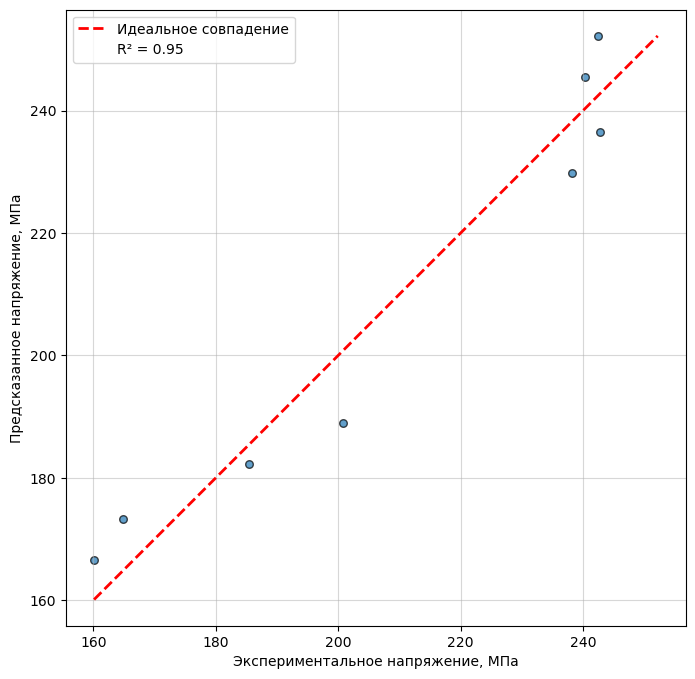

In [37]:
# посмотрим на график паритера
min_val = min(regression.target_values_avg.min(), regression.target_values_model.min())
max_val = max(regression.target_values_avg.max(), regression.target_values_model.max())


plt.figure(figsize=(8, 8))
plt.scatter(regression.target_values_avg, regression.target_values_model, alpha=0.7, edgecolors='k', s=30)
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Идеальное совпадение')
plt.plot ([], [], ' ', label = f'R² = {R2:.2f}')
    
plt.xlabel('Экспериментальное напряжение, МПа')
plt.ylabel('Предсказанное напряжение, МПа')
plt.legend()
plt.grid(True, alpha=0.5)
plt.axis('equal');  # чтобы угол был именно 45°

## 5. Работа с итоговой моделью

In [43]:
# матрица планирования в натуральном масштабе
X_natural = np.array([
    [1, 0.10, 0.7, 0],    # опыт 1
    [1, 0.06, 0.7, 0],    # опыт 2
    [1, 0.10, 1.2, 0],    # опыт 3
    [1, 0.06, 1.2, 0],    # опыт 4
    [1, 0.10, 0.7, 90],   # опыт 5
    [1, 0.06, 0.7, 90],   # опыт 6
    [1, 0.10, 1.2, 90],   # опыт 7
    [1, 0.06, 1.2, 90]    # опыт 8
])

In [60]:
# Нам нужно перейти от натурального к кодированному масштаба. Для этого создадим функцию.
def calculate_coding_params(column):
    """
    Расчет параметров кодирования для столбца
    column: столбец матрицы в натуральном масштабе
    Возвращает: (центр уровня, интервал варьирования)
    """
    # Min и max столбца
    x_min = np.min(column)
    x_max = np.max(column)
    
    # Центр уровня
    x_center = (x_max + x_min) / 2
    
    # Интервал варьирования
    x_interval = (x_max - x_min) / 2
    
    return round(x_center, 5), round(x_interval,5)

# создадим переменные для хранения центра уровня и интервала варьирования
x_center, x_interval = [], []

for i in range (1, X_natural.shape[1]):
    x_center_i, x_interval_i = calculate_coding_params (X_natural[:, i])
    x_center.append(float(x_center_i))
    x_interval.append(float(x_interval_i))

x_center = np.array(x_center)
x_interval = np.array(x_interval)

print (f'Центры уровней матрицы плана в натуральном масштабе: {x_center}')
print (f'Интервалы варьирования: {x_interval}')   

Центры уровней матрицы плана в натуральном масштабе: [ 0.08  0.95 45.  ]
Интервалы варьирования: [ 0.02  0.25 45.  ]


In [71]:
# Допустим у нас есть хим. состав
C_ = 0.085
t_ = 1.
angle = 60
params = np.array([C_, t_, angle])

In [73]:
# переведем параметры в кодированный масштаб
params_coded = (params - x_center)/x_interval

In [74]:
# добавим единицу к параметрам к кодированном масштабе для учета свободного коэффициента
params_coded = np.concatenate(([1], params_coded))
print (f'Параметры в кодированном масштабе: {params_coded}')

Параметры в кодированном масштабе: [1.     0.25   0.2    0.3333]


In [77]:
# значение предела текучести при заданных параметрах
sigma02 = regression.coefs@params_coded
print (f'Расчетное значение предела текучести при заданных параметрах: {sigma02:.2f} МПа')

Расчетное значение предела текучести при заданных параметрах: 219.96 МПа
